In [1]:
# Importação de Bibliotecas 
from arquivo_preprocessado import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.model_selection import cross_val_score
import pickle
import warnings
warnings.filterwarnings ("ignore")


In [2]:
# Importação dos dados tratados em arquivo_preprocessado.py 
X_train, y_train, X_test, y_test, X_test_final , y_test_final = preprocessing()

In [3]:
X_test_final.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
14682,1785,40,26.000000,15,True,False,False,True,False,True,False,True,False,False
191740,341,20,27.000000,0,False,True,True,False,False,False,True,True,True,False
16359,1678,40,30.000000,4,True,False,True,False,False,True,False,True,False,False
202953,2541,30,48.781630,2,True,True,True,False,False,True,True,False,True,False
150867,915,20,34.344879,0,True,True,True,True,False,False,True,True,True,False


In [4]:
X_test.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
153019,1898,20,38.619634,3,True,False,True,False,False,True,False,False,True,False
217550,851,40,40.169675,0,True,False,True,True,False,False,True,False,True,False
111938,625,20,31.459115,0,False,True,True,True,False,False,True,False,False,True
156718,2401,20,54.000000,0,True,False,True,True,False,False,True,False,True,True
166575,1785,30,50.000000,0,True,False,True,False,False,False,True,True,True,False


In [6]:
X_train.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
87647,3164,15,35.000000,22,True,False,True,False,False,True,False,False,False,True
88978,789,25,34.270974,0,True,True,True,False,False,False,True,True,True,False
178818,851,40,37.026060,0,True,False,True,True,False,False,True,True,True,False
108603,984,5,46.000000,0,True,True,True,False,False,False,True,True,True,False
171586,1478,40,44.142342,0,True,True,True,True,False,False,True,False,True,False


In [5]:
# Seleção de modelos com configuração padrão
def selecao(X_train , X_test , Y_train , Y_test): 
    X_rank = np.concatenate([X_train, X_test])
    Y_rank = np.concatenate([Y_train, Y_test])
    for model in [RandomForestClassifier,GradientBoostingClassifier,CatBoostClassifier]:
      cls = model()
      kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=7 )
      s = cross_val_score(cls, X_rank, Y_rank, scoring="accuracy", cv=kfold)
      print(f"{model.__name__:22} Score: "f"{s.mean():.3f}")
      

In [6]:
# Chamada da função de seleção de modelos
print(" Seleção de modelos:")
selecao (X_train, X_test, y_train, y_test)

 Seleção de modelos:
RandomForestClassifier Score: 0.901
GradientBoostingClassifier Score: 0.738
Learning rate set to 0.102701
0:	learn: 1.0508679	total: 202ms	remaining: 3m 21s
1:	learn: 1.0133129	total: 241ms	remaining: 2m
2:	learn: 0.9827066	total: 286ms	remaining: 1m 35s
3:	learn: 0.9448647	total: 329ms	remaining: 1m 21s
4:	learn: 0.9162647	total: 375ms	remaining: 1m 14s
5:	learn: 0.8879326	total: 421ms	remaining: 1m 9s
6:	learn: 0.8715279	total: 476ms	remaining: 1m 7s
7:	learn: 0.8518784	total: 528ms	remaining: 1m 5s
8:	learn: 0.8311885	total: 580ms	remaining: 1m 3s
9:	learn: 0.8135573	total: 626ms	remaining: 1m 2s
10:	learn: 0.8031011	total: 671ms	remaining: 1m
11:	learn: 0.7937243	total: 712ms	remaining: 58.6s
12:	learn: 0.7810270	total: 752ms	remaining: 57.1s
13:	learn: 0.7717312	total: 799ms	remaining: 56.3s
14:	learn: 0.7618042	total: 847ms	remaining: 55.6s
15:	learn: 0.7509202	total: 894ms	remaining: 55s
16:	learn: 0.7393445	total: 943ms	remaining: 54.5s
17:	learn: 0.7316364

In [9]:
# GridSearchCV com valores padrão do modelo RF devido a ótima performance inicial
def modelo (x_train , y_train):
   param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': [1],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100],
    'random_state': [42],
   }
   rf = RandomForestClassifier()
   grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 10, n_jobs = -1, verbose = 3,scoring='recall',return_train_score=True)
   grid_search.fit(x_train, y_train)
   return grid_search

In [10]:
y_train.shape

(154693,)

In [11]:
X_train.shape

(154693, 14)

In [12]:
# Chamada da função de otimização de hiperparâmetros
modelo = modelo (X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


KeyboardInterrupt: 

In [5]:
y_pred = modelo.predict(X_test)
accuracy = accuracy_score (y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.99%


In [15]:
# salvar modelo em arquivo pkl para utilizar posteriormente
def salvar(modelo):
   with open('agro_model_final.pkl', 'wb') as file:
     pickle.dump(modelo, file)

In [7]:
# Função das métricas de avaliação do modelo
def metrica(y_test):
    yhat = modelo.predict(X_test_final)
    Acuracia = accuracy_score(y_test,yhat)
    Matrix = confusion_matrix(y_test,yhat)
    Report = classification_report(y_test,yhat)
    return Acuracia , Matrix , Report

In [8]:
# Chamada de função mátrica (Avaliação do resultado)
Acuracia , Matrix, Report = metrica (y_test_final)

In [9]:
# print da função metrica
print("Acurácia:", Acuracia)
print("Matrix de Confusão:\n", Matrix)
print("Relatório de Classificação:\n", Report)

Acurácia: 0.8969834087481147
Matrix de Confusão:
 [[4131  295   29]
 [ 487 3644  266]
 [  76  213 4119]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4455
           1       0.88      0.83      0.85      4397
           2       0.93      0.93      0.93      4408

    accuracy                           0.90     13260
   macro avg       0.90      0.90      0.90     13260
weighted avg       0.90      0.90      0.90     13260



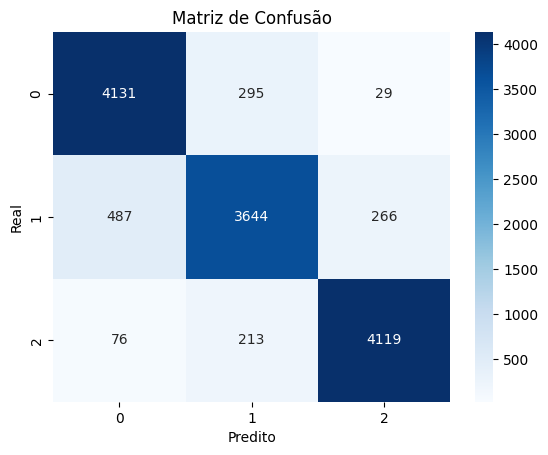

In [10]:
sns.heatmap(Matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [16]:
salvar(modelo)

> [!SUCCESS]
>
> Resultado satisfatório

[COMENTÁRIO NA CRIAÇÃO DO MODELO INICIAL SEM ALTERAÇÃO DO DATAFRAME E MODELO DO CRIADOR] Claramente notou necessário ser realizado um trabalho de engenharia de recurso de balanceamento de target para obter melhor métrica para as classes de menor quantidade e manter linhas de valores nulos em apenas uma coluna para não perder dados.
 

[COMPLEMENTANDO RESPOSTA ACIMA] Utilizado Técnica de balanceamento ADASYN , com os dados distribuidos uniformemente, Randon Forrest ganhou em relação aos de mais. Com relação aos valores nulos foi realizado a imputação dos dados com relação a média dos valores da respectiva coluna agrupadas para cada target.

Dados foram separados em 3 conjuntos de dados (X,y):

Treino ; teste e teste_final, este totalmente isolado para avaliação do modelo final.


Não utilizado normalização, pois, não possui valores excessivamente extremos.

Conforme esclarecimento de IA:

1) Algoritmo Insensível à Escala:

    Alguns algoritmos, como árvores de decisão e Random Forests, não são sensíveis à escala dos dados. Eles fazem divisões nas features independentemente da escala, tornando a normalização menos crucial para esses modelos. Se o seu modelo é baseado em árvores de decisão, isso pode explicar o ganho.

2) Normalização Introduz Ruído:

    Em alguns casos, a normalização pode introduzir ruído nos dados, especialmente se a distribuição dos dados não for adequada para a normalização escolhida. Remover a normalização pode levar a uma representação mais fiel dos padrões subjacentes nos dados, resultando em um melhor desempenho do modelo.

3) Natureza dos Dados:

    Se os dados já estiverem em escalas semelhantes ou se a variação nas magnitudes das features não for relevante para o problema em questão, a normalização pode não fornecer benefícios tangíveis.

4) Outliers

      A normalização pode ser sensível a outliers. Se os seus dados contêm outliers e a normalização está sendo afetada por eles, remover a normalização pode ajudar a mitigar esse impacto negativo.

    Lembre-se de que a decisão de normalizar ou não depende muito do contexto específico do seu conjunto de dados e do algoritmo que você está usando. - ChatGPT 

